In [1]:
import pandas as pd
import pickle
import seaborn as sns
from glob import glob
sns.set_theme(style="whitegrid")

In [2]:
def read_pickle(model, lang, layer, pooling):
    folder = '/home/kushal/SentEval/examples/'
    if model == 'pixel':
        filename = model+'_p='+pooling+'_l='+layer+'_lg='+lang+'_s=1111.pickle'
    else:
        filename = model+'_p='+pooling+'_l='+layer+'_lg='+lang+'_s=1111.csv.pickle'
    with open(folder + filename, 'rb') as handle:
    #with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    df_list = []
    df_scores = {}
    for key, index in data.items():
        # print(key)
        score_dict = {'DevAcc': index['devacc'], 'Acc': index['acc'], 'NDev': index['ndev'], 'NTest': index['ntest']}
        list_dict = {'indexes':list(index['indexes']), 'targets':list(index['targets']), 'predictions':list(index['predictions'])}
        df_l = pd.DataFrame.from_dict(list_dict)
        df_scores[key]=score_dict
        df_list.append(df_l)
    df = pd.DataFrame.from_dict(df_scores, orient='index')
    df['Model'] = model
    return df, df_list


In [3]:
datab = []
datam = []
# datap = []
for i in range(1,13):
  datab.append(read_pickle('bert', 'Hindi', str(i), 'mean')[0]['Acc'])
  datam.append(read_pickle('mbert', 'Hindi', str(i), 'mean')[0]['Acc'])
  # datap.append(read_pickle('pixel', 'Tamil', str(i), 'mean')[0]['Acc'])

print(read_pickle('bert', 'Tamil', str(i), 'mean')[0])

              DevAcc    Acc  NDev  NTest Model
Ta_Case        58.23  61.67    79    120  bert
Ta_Gender      70.89  65.00    79    120  bert
Ta_Mood        97.37  97.46    76    118  bert
Ta_Number      80.00  70.00    80    120  bert
Ta_NumType     78.26  90.00    23     50  bert
Ta_Person      92.50  99.17    80    120  bert
Ta_PunctType   97.50  95.83    80    120  bert
Ta_Tense       44.44  48.60    72    107  bert
Ta_VerbForm    58.75  40.83    80    120  bert


In [4]:
dfb = pd.concat(datab, axis=1)
dfb.columns = list(range(1,13))

dfm = pd.concat(datam, axis=1)
dfm.columns = list(range(1,13))

# dfp = pd.concat(datap, axis=1)
# dfp.columns = list(range(1,13))

dfb_aux = dfb.T
dfb_aux['Model'] = 'bert'
dfm_aux = dfm.T
dfm_aux['Model'] = 'mbert'
# dfp_aux = dfp.T
# dfp_aux['Model'] = 'pixel'
all_list = [dfb_aux, dfm_aux,
            # dfp_aux
            ]
dev_df = pd.concat(all_list)


In [5]:
dev_df

,Hi_Aspect,Hi_Case,Hi_Gender,Hi_Mood,Hi_Number,Hi_NumType,Hi_Person,Hi_PronType,Hi_Tense,Hi_VerbForm,Hi_Voice,Model
1,92.07,62.95,79.26,98.12,88.35,89.13,99.88,62.89,73.19,73.40,91.38,bert
2,92.07,63.36,79.62,98.12,88.41,89.13,99.88,63.32,73.72,73.46,91.27,bert
3,92.07,65.62,80.57,98.12,88.41,89.13,99.88,63.32,74.56,74.35,91.98,bert
4,92.14,66.92,81.46,98.12,88.47,89.13,99.88,63.66,74.64,74.64,91.50,bert
5,92.71,68.53,81.76,98.12,89.30,89.13,99.88,64.09,74.79,74.94,91.68,bert
6,92.21,68.47,82.17,98.12,88.89,89.13,99.88,64.34,75.17,74.70,91.80,bert
7,92.49,68.35,81.64,98.12,89.42,89.13,99.88,64.26,75.17,73.63,92.04,bert
8,92.57,68.23,82.00,98.04,89.54,89.13,99.88,64.51,74.41,75.06,91.92,bert
9,92.57,68.05,81.28,98.12,88.59,89.13,99.88,64.51,75.17,73.87,91.80,bert
10,92.85,69.30,81.40,98.12,89.13,89.13,99.88,63.74,75.55,75.83,91.86,bert


/home/kushal/anaconda3/envs/pixel-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kushal/anaconda3/envs/pixel-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Hi_Mood'>

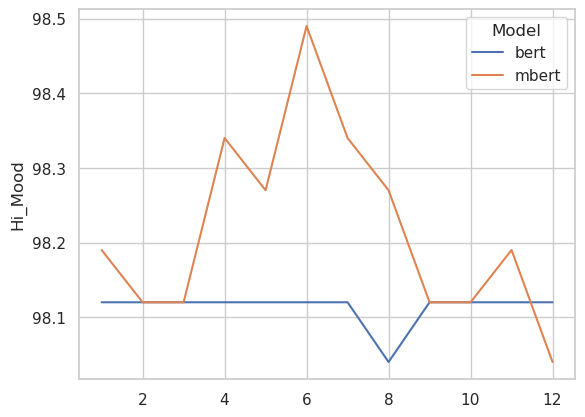

In [9]:
sns.lineplot(data=dev_df, x=dev_df.index, y='Hi_Mood', hue='Model')


In [7]:
df, test = read_pickle('bert', '4','all','mean')
df

,DevAcc,Acc,NDev,NTest,Model
Length,94.08,94.02,9996,9996,bert
WordContent,83.04,83.06,10000,10000,bert
Depth,42.79,42.60,10000,10000,bert
TopConstituents,80.43,80.41,10000,10000,bert
BigramShift,90.48,89.98,10000,10000,bert
Tense,90.41,88.93,10000,10000,bert
SubjNumber,87.13,85.95,10000,10000,bert
ObjNumber,83.83,85.38,10000,10000,bert
OddManOut,65.27,64.99,10000,10000,bert
CoordinationInversion,69.49,68.92,10002,10002,bert


In [12]:
df_p, test_p = read_pickle('bert', 'arabic','all','mean')
df_p

FileNotFoundError: [Errno 2] No such file or directory: '/home/kushal/SentEval/examples/bert_p=mean_l=all_lg=arabic_s=1111.csv.pickle'

In [12]:
folder = '/content/drive/MyDrive/Pixel_SentEval/task_0_preds/pickle/'
filename = 'pixel_p=cls_l=all_t=0_s=1111.pickle'
with open(folder + filename, 'rb') as handle:
    data = pickle.load(handle)

In [53]:
data.keys()

dict_keys(['CR', 'MR', 'MPQA', 'SUBJ', 'SST2', 'SST5', 'TREC'])

In [22]:
data['CR'].keys()

dict_keys(['devacc', 'acc', 'ndev', 'ntest', 'indexes', 'targets', 'predictions'])

In [7]:
df = pd.DataFrame

In [47]:
df_scores = {}
for key, index in data.items():
    print(key)
    score_dict = {'DevAcc': index['devacc'], 'Acc': index['acc'], 'NDev': index['ndev'], 'NTest': index['ntest']}
    # df_s = pd.DataFrame.from_dict(score_dict)
    df_scores[key]=score_dict


CR
MR
MPQA
SUBJ
SST2
SST5
TREC


In [48]:
df_scores

{'CR': {'DevAcc': 74.1, 'Acc': 71.84, 'NDev': 3775, 'NTest': 3775},
 'MR': {'DevAcc': 70.28, 'Acc': 69.43, 'NDev': 10662, 'NTest': 10662},
 'MPQA': {'DevAcc': 79.42, 'Acc': 79.26, 'NDev': 10606, 'NTest': 10606},
 'SUBJ': {'DevAcc': 89.89, 'Acc': 89.23, 'NDev': 10000, 'NTest': 10000},
 'SST2': {'DevAcc': 76.49, 'Acc': 74.41, 'NDev': 872, 'NTest': 1821},
 'SST5': {'DevAcc': 38.69, 'Acc': 38.73, 'NDev': 1101, 'NTest': 2210},
 'TREC': {'DevAcc': 65.57, 'Acc': 71.2, 'NDev': 5452, 'NTest': 500}}

In [45]:
df

,CR,MR,MPQA,SUBJ,SST2,SST5,TREC
0,"{'DevAcc': 74.1, 'Acc': 71.84, 'NDev': 3775, '...",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"{'DevAcc': 70.28, 'Acc': 69.43, 'NDev': 10662,...",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"{'DevAcc': 79.42, 'Acc': 79.26, 'NDev': 10606,...",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"{'DevAcc': 89.89, 'Acc': 89.23, 'NDev': 10000,...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"{'DevAcc': 76.49, 'Acc': 74.41, 'NDev': 872, '...",NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,"{'DevAcc': 38.69, 'Acc': 38.73, 'NDev': 1101, ...",NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"{'DevAcc': 65.57, 'Acc': 71.2, 'NDev': 5452, '..."
